In [1]:
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
import numpy as np
import math as m
import vice
import sys
sys.path.append("..")
from src.utils import mu, get_velocity_profile
load_style_sheet("papers")
print(sys.version_info)

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


In [2]:
output = vice.output("../outputs/constant/vgas-1")

/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_98626/1641790235.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


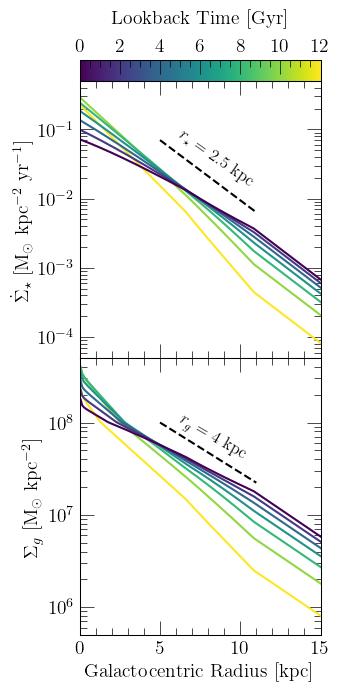

In [42]:
LOOKBACKS = [12, 10, 8, 6, 4, 2, 0]
COLORMAP = "viridis"

fig = plt.figure(figsize = (3.5, 7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)
for ax in [ax1, ax2]: ax.set_yscale("log")
ax1.set_xlim([0, 15])
ax2.set_xlabel(r"Galactocentric Radius [kpc]")
plt.setp(ax1.get_xticklabels(), visible = False)
ax1.set_ylabel(r"$\dot \Sigma_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]")
ax2.set_ylabel(r"$\Sigma_g$ [M$_\odot$ kpc$^{-2}$]")
ax1.set_ylim([5.e-5, 0.5])
ax2.set_ylim([5.e5, 5.e8])

norm = plt.Normalize(vmin = min(LOOKBACKS), vmax = max(LOOKBACKS))
cmap = plt.cm.ScalarMappable(cmap = COLORMAP, norm = norm)
cbar_ax = fig.add_axes([0.2, 0.8, 0.6, 0.05])
cbar = plt.colorbar(cmap, cax = cbar_ax, orientation = "horizontal", location = "top")
cbar.set_label("Lookback Time [Gyr]", labelpad = 10)
cbar.set_ticks(LOOKBACKS)

def plot_snapshot(ax_sfh, ax_gas, output, lookback, zone_width = 0.1, **kwargs):
    radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    sigma_sfr = []
    sigma_gas = []
    for i in range(len(radii)):
        area = np.pi * ((radii[i] + zone_width / 2)**2 - (radii[i] - zone_width / 2)**2)
        zone = output.zones["zone%d" % (i)]
        sigma_sfr.append(zone.history["sfr"][idx] / area)
        sigma_gas.append(zone.history["mgas"][idx] / area)
    ax_sfh.plot(radii, sigma_sfr, **kwargs)
    ax_gas.plot(radii, sigma_gas, **kwargs)

for i in range(len(LOOKBACKS)):
    kwargs = {"c": cmap.to_rgba(LOOKBACKS[i])}
    plot_snapshot(ax1, ax2, output, LOOKBACKS[i], **kwargs)

kwargs = {
    "c": named_colors()["black"],
    "linestyle": "--"
}
xvals = np.linspace(5, 11, 100)
yvals = [0.07 * np.exp(-(x - 5) / 2.5) for x in xvals]
ax1.plot(xvals, yvals, **kwargs)
yvals = [1.e8 * np.exp(-(x - 5) / 4) for x in xvals]
ax2.plot(xvals, yvals, **kwargs)
ax1.text(6, 0.015, r"$r_\star = 2.5$ kpc", fontsize = 12, rotation = -35)
ax2.text(6, 4e7, r"$r_g = 4$ kpc", fontsize = 12, rotation = -30)

plt.tight_layout()
plt.subplots_adjust(hspace = 0, top = 0.88)
cbar_ax.set_position([
    ax1.get_position().x0,
    ax1.get_position().y1,
    ax1.get_position().x1 - ax1.get_position().x0,
    0.03
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./evol/sfh-gas.%s" % (ext), **kwargs)
plt.show()